# SND Analysis

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter

#other
import json

In [2]:
sns.set()

In [3]:
tm = [
    "XLNet Base",
    
    "BERT Base",
    "BERT Multilingual",
    
    "Distil BERT Base",
    "Distil BERT Multilingual",
    
    "Distil RoBERTa",
    "RoBERTa Base",
    
    "XLM RoBERTa",
    
    "ELECTRA Base",
    "ELECTRA Small"
]
sub_path_name = [
    ["xlnet", "xlnet-base-cased"],

    ["bert", "bert-base-cased"],
    ["bert", "bert-base-multilingual-cased"],

    ["distilbert", "distilbert-base-uncased"],
    ["distilbert", "distilbert-base-multilingual-cased"],

    ["roberta", "distilroberta-base"],
    ["roberta", "roberta-base"],

    ["xlmroberta", "xlm-roberta-base"],

    ["electra", "google/electra-base-discriminator"],
    ["electra", "google/electra-small-discriminator"]
]

## Data Exploration

In [4]:
DATASETS_PATH = "../datasets/" 
df = pd.read_csv(f"{DATASETS_PATH}DA_suicide_notes.csv")
df.head()

,text,complete_text
0,put writing somehow stick feel good honestly,I have to put this in writing somehow so I sti...
1,made peace fact going kill one day head train ...,I've made my peace with the fact that I'm goin...
2,really want help cant anymore alone feel hopeless,I really want help now i just cant so this any...
3,think reason stay sense stability area life fu...,I can't think of any reason to stay. I have no...
4,hi first post new community struggling suicida...,"Hi, it's my first post here, I'm new in this c..."


### Text Length

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


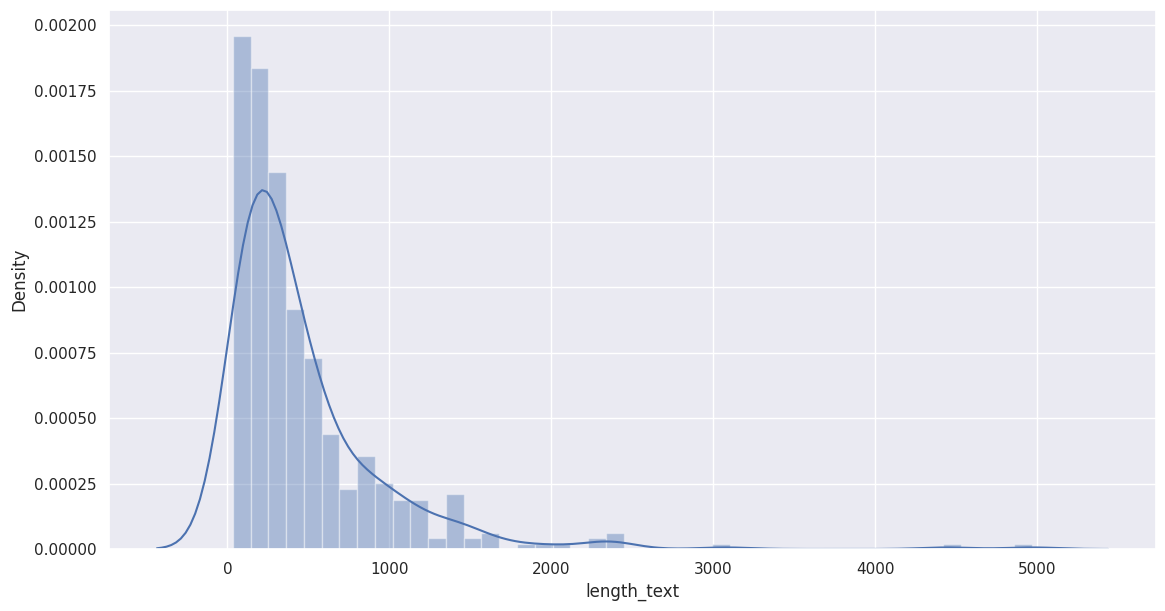

In [5]:
df["length_text"] = df["text"].apply(len)
plt.figure(figsize=(13.5,7))
sns.distplot(df["length_text"])

plt.savefig(f'../figures/Suicide/SND Processed Text Length .png')

plt.show()

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


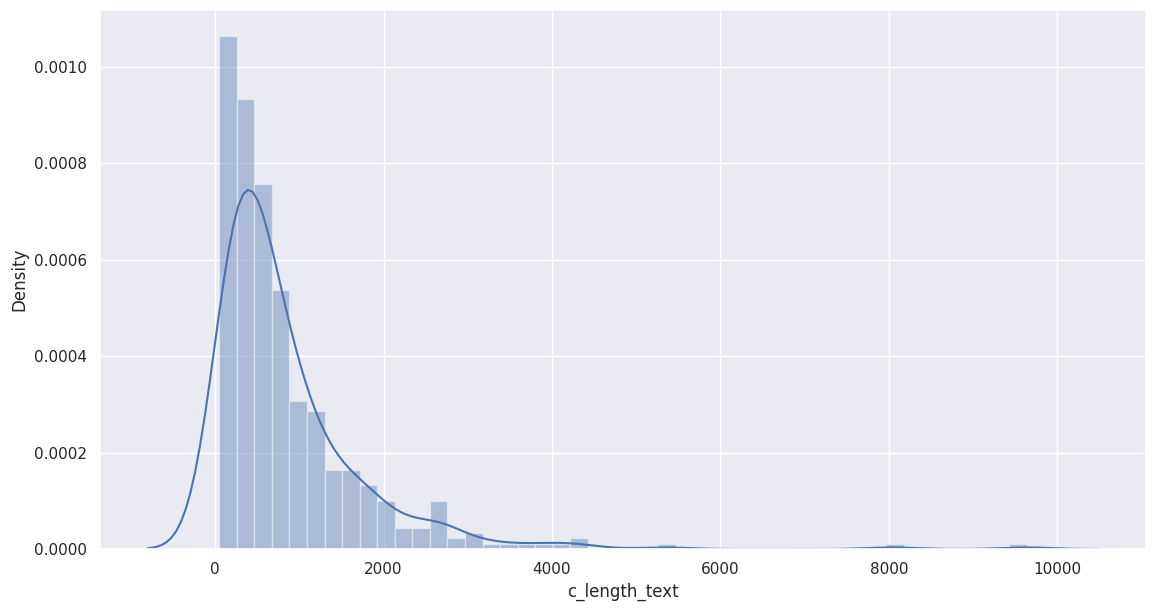

In [6]:
df["c_length_text"] = df["complete_text"].apply(len)
plt.figure(figsize=(13.5,7))
sns.distplot(df["c_length_text"])

plt.savefig(f'../figures/Suicide/SND Processed Text Length .png')

plt.show()

### Word Count

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


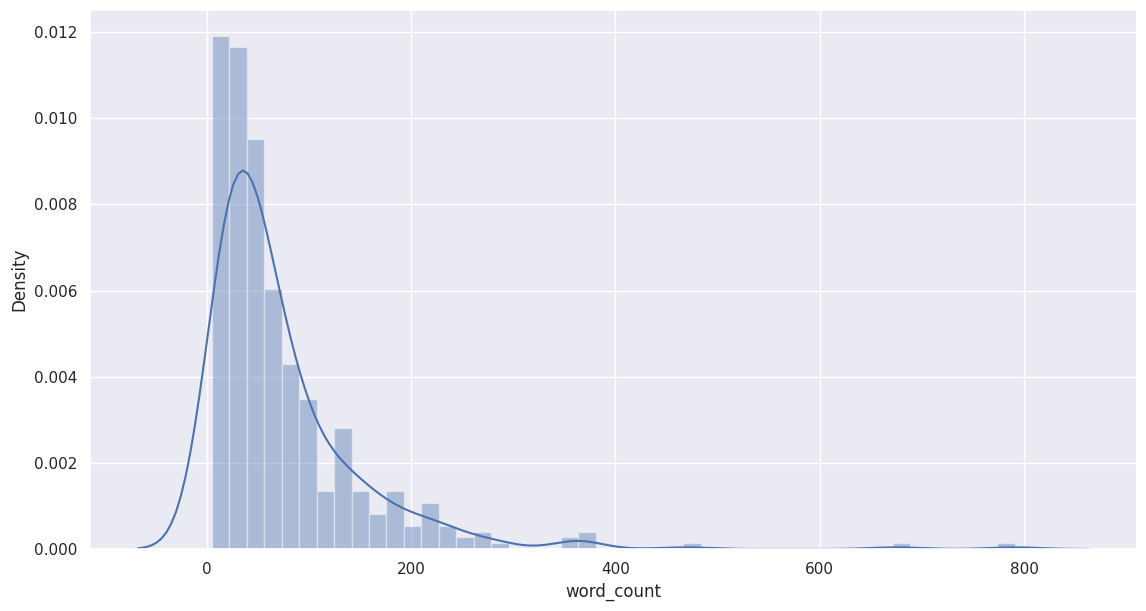

In [7]:
def word_count(text):
    wc = len(text.split())
    return wc

df['word_count'] = df['text'].apply(word_count)
plt.figure(figsize=(13.5,7))
sns.distplot(df['word_count'])

plt.savefig(f'../figures/Suicide/SND Processed Word Count.png')

plt.show()

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


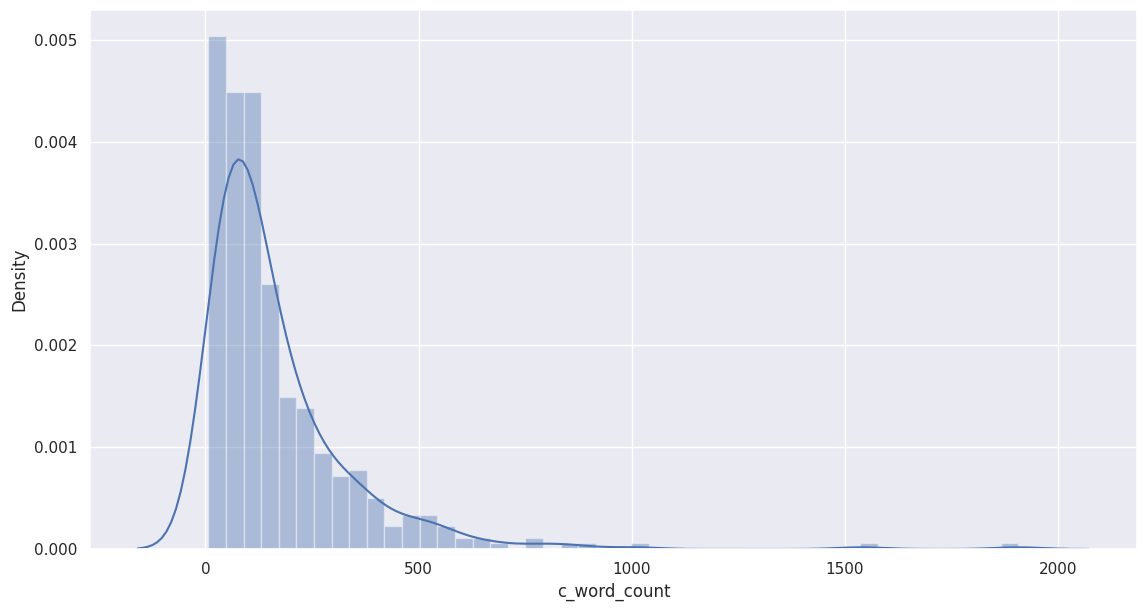

In [8]:
df['c_word_count'] = df['complete_text'].apply(word_count)
plt.figure(figsize=(13.5,7))
sns.distplot(df['c_word_count'])

plt.savefig(f'../figures/Suicide/SND Word Count.png')

plt.show()

### Word Frecuency (WordCloud)

In [9]:
df.head()

,text,complete_text,length_text,c_length_text,word_count,c_word_count
0,put writing somehow stick feel good honestly,I have to put this in writing somehow so I sti...,44,75,7,16
1,made peace fact going kill one day head train ...,I've made my peace with the fact that I'm goin...,280,505,44,99
2,really want help cant anymore alone feel hopeless,I really want help now i just cant so this any...,49,72,8,15
3,think reason stay sense stability area life fu...,I can't think of any reason to stay. I have no...,404,700,56,125
4,hi first post new community struggling suicida...,"Hi, it's my first post here, I'm new in this c...",1006,1782,151,337


In [10]:
#Finding the most common words in all suicide notes (preprocessed).
words = list(df["text"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('like', 455),
 ('want', 386),
 ('life', 363),
 ('feel', 354),
 ('get', 308),
 ('even', 303),
 ('know', 295),
 ('time', 268),
 ('would', 253),
 ('one', 237),
 ('day', 211),
 ('year', 206),
 ('people', 198),
 ('go', 195),
 ('friend', 193),
 ('really', 191),
 ('thing', 184),
 ('never', 181),
 ('going', 176),
 ('think', 175),
 ('much', 167),
 ('make', 167),
 ('anymore', 165),
 ('help', 152),
 ('end', 144),
 ('fucking', 144),
 ('im', 140),
 ('way', 136),
 ('care', 136),
 ('could', 133),
 ('thought', 131),
 ('die', 131),
 ('everything', 127),
 ('kill', 125),
 ('someone', 125),
 ('live', 123),
 ('family', 121),
 ('suicide', 120),
 ('anything', 120),
 ('still', 117)]

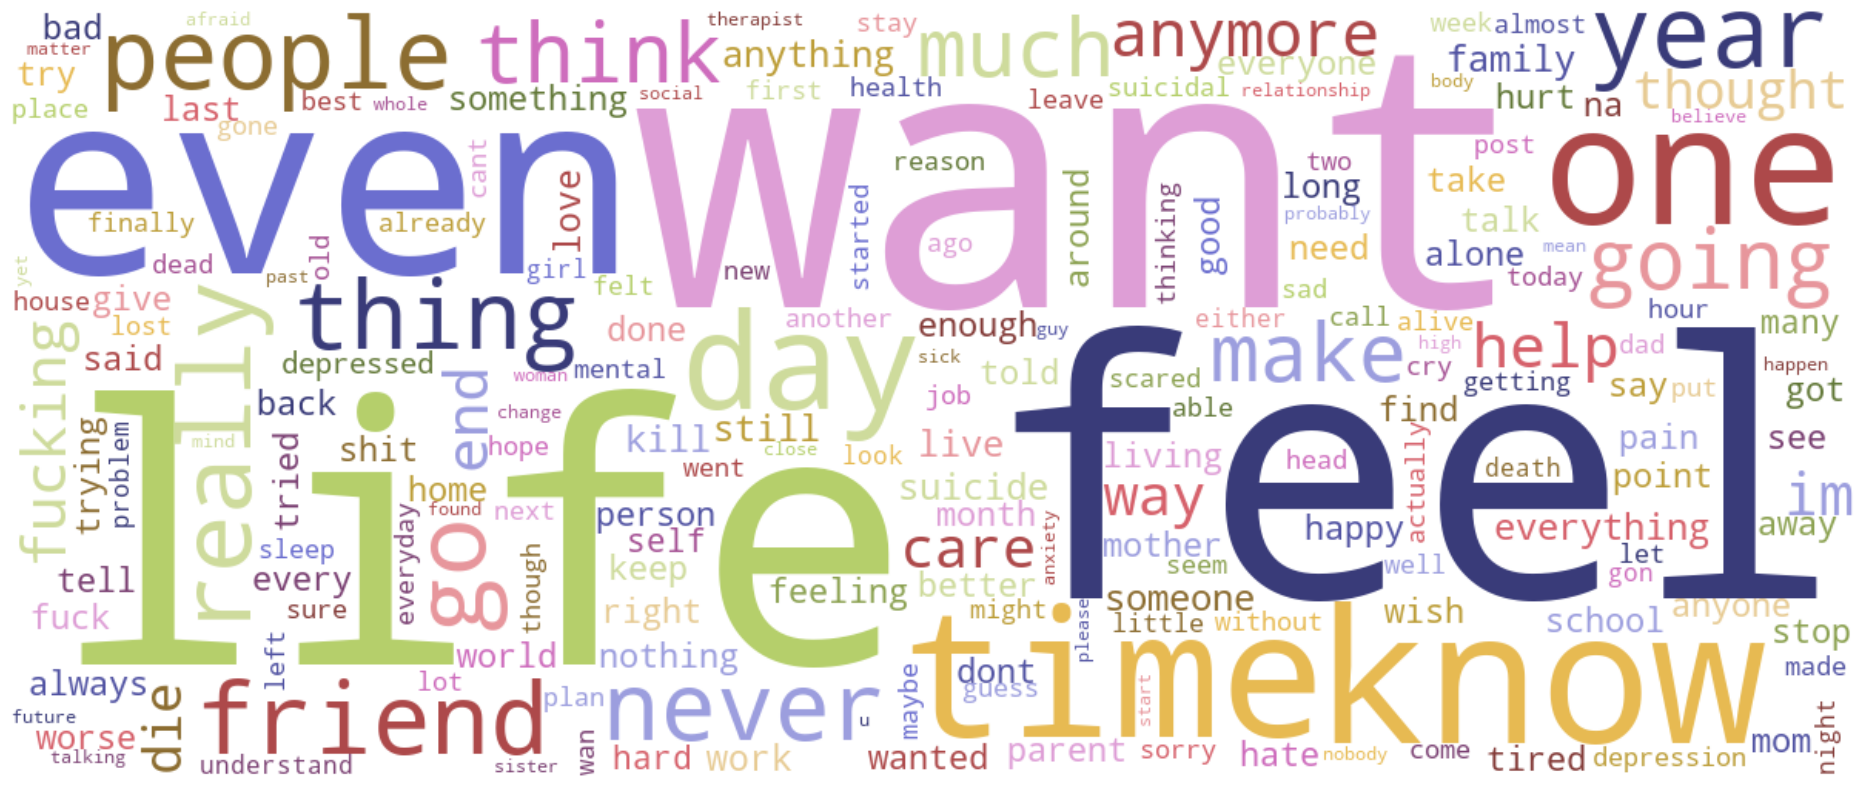

In [11]:
#Plotting the most common words with WordCloud.
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

plt.savefig(f'../figures/Suicide/SND Processed Wordcloud.png')

plt.show()

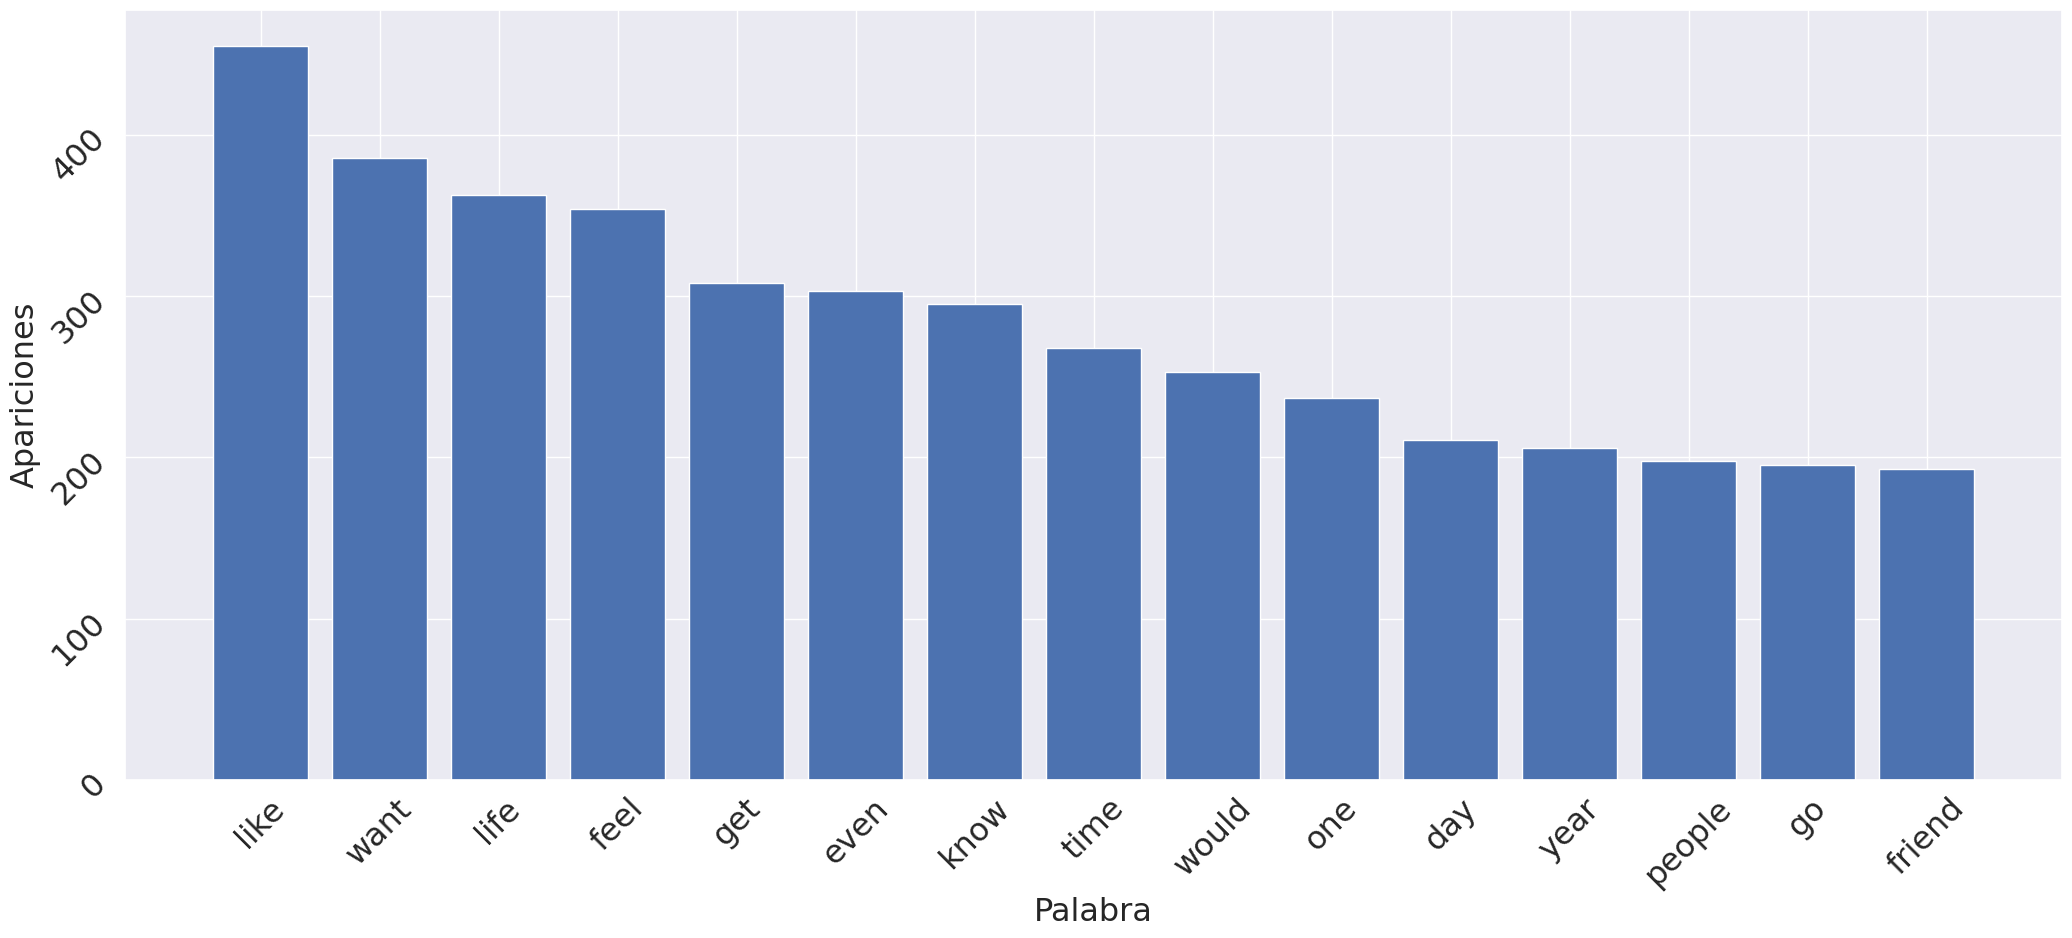

In [12]:
plt.figure(figsize=(25,10))

plt.bar([Counter(words).most_common(40)[i][0] for i in range(15)], 
       [Counter(words).most_common(40)[i][1] for i in range(15)])

plt.xlabel("Palabra", fontsize=23)
plt.ylabel("Apariciones", fontsize=23)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23, rotation=45)
plt.savefig(f'../figures/Suicide/Word count in SND after preprocessing.png')

plt.show()

In [13]:
#Finding the most common words in all suicide notes (preprocessed).
words = list(df["complete_text"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('I', 3856),
 ('to', 2648),
 ('and', 2150),
 ('the', 1469),
 ('my', 1398),
 ('a', 1388),
 ('of', 1037),
 ('me', 852),
 ('that', 738),
 ('in', 725),
 ('just', 685),
 ('for', 644),
 ('i', 622),
 ('it', 619),
 ('have', 609),
 ('is', 609),
 ('but', 594),
 ('so', 492),
 ('be', 461),
 ("I'm", 456),
 ('with', 455),
 ('was', 454),
 ('this', 450),
 ('like', 414),
 ('do', 364),
 ('not', 354),
 ('want', 351),
 ('I’m', 336),
 ('about', 328),
 ('on', 319),
 ('feel', 314),
 ('if', 288),
 ('or', 284),
 ('get', 283),
 ('even', 279),
 ('at', 267),
 ('no', 265),
 ('because', 263),
 ('myself', 257),
 ('know', 255)]

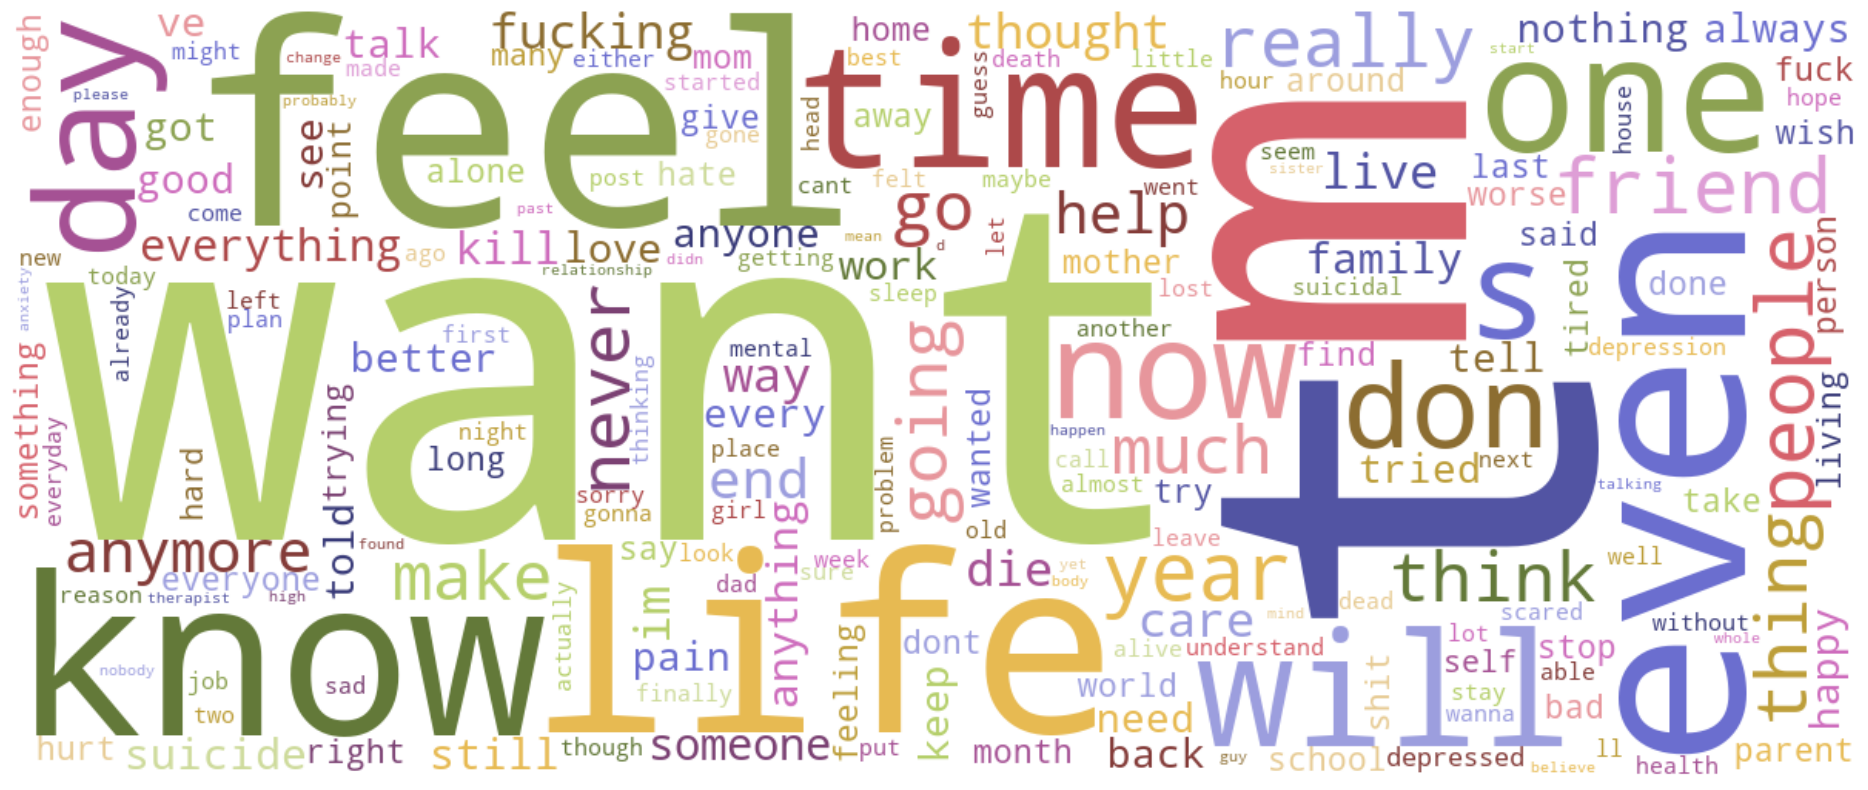

In [14]:
#Plotting the most common words with WordCloud.
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

plt.savefig(f'../figures/Suicide/SND Wordcloud.png')

plt.show()

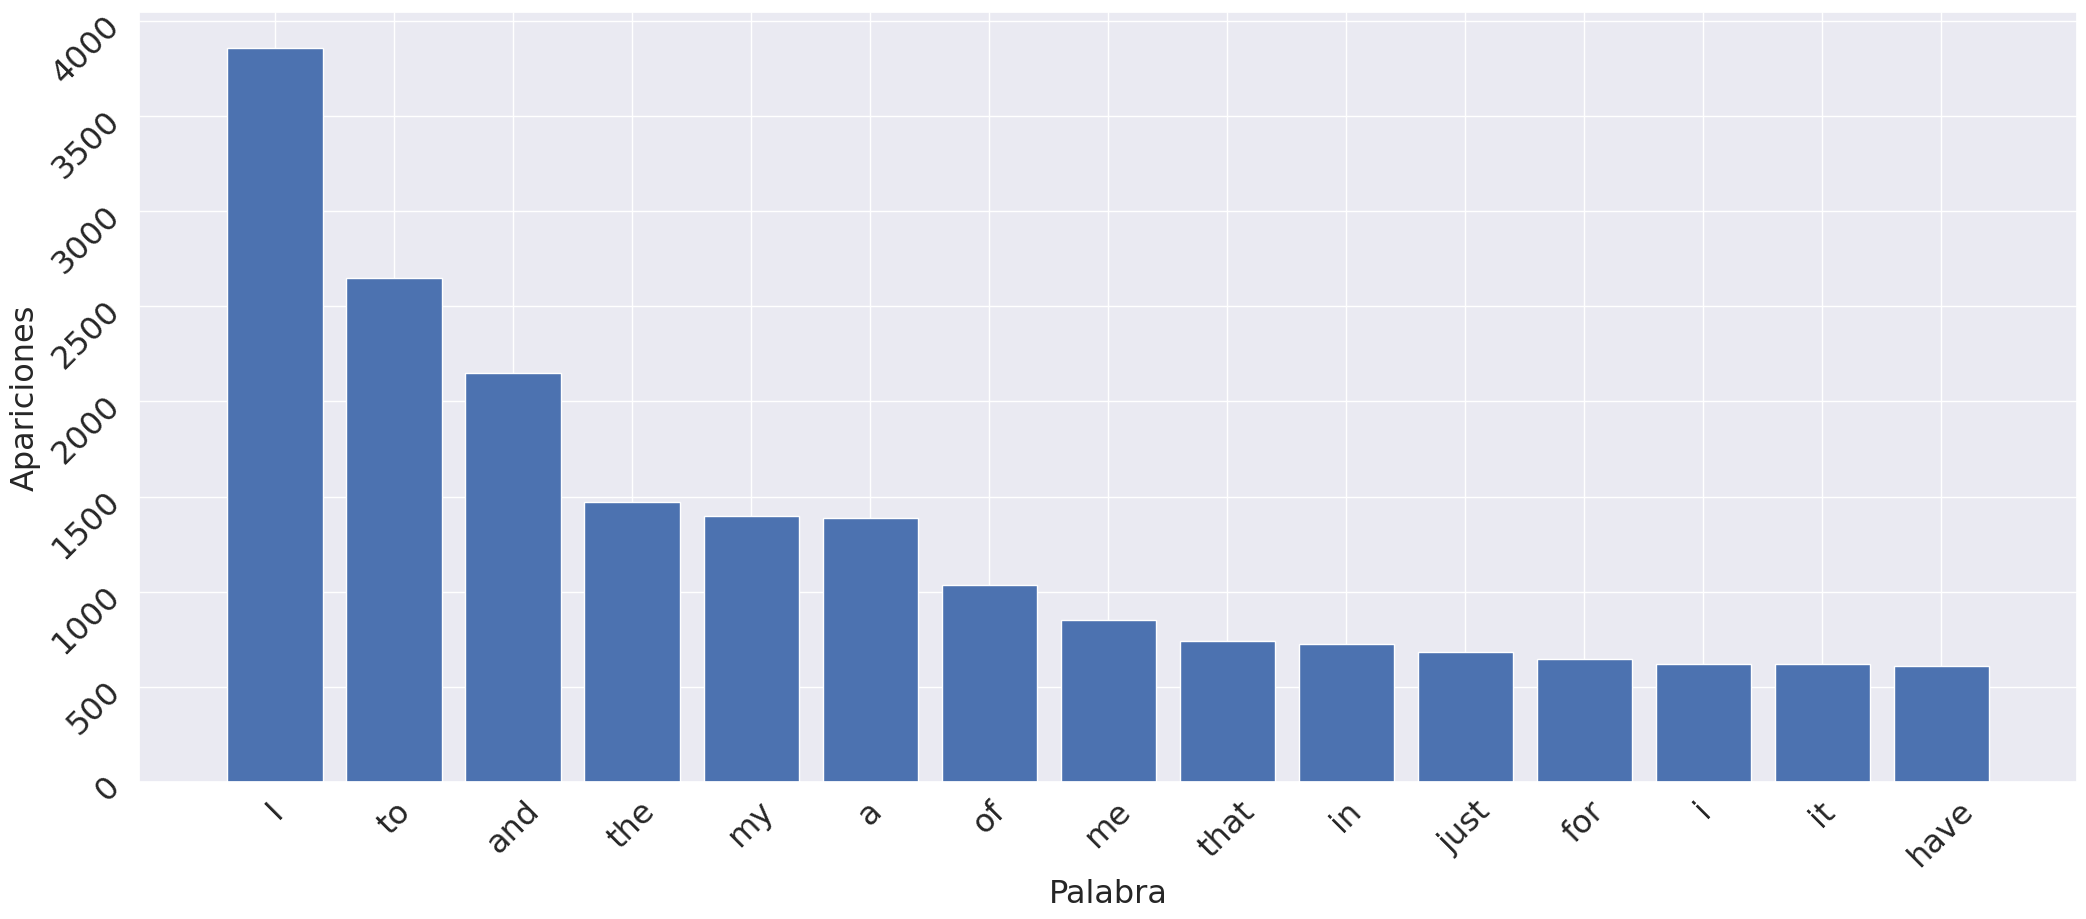

In [15]:
plt.figure(figsize=(25,10))

plt.bar([Counter(words).most_common(40)[i][0] for i in range(15)], 
       [Counter(words).most_common(40)[i][1] for i in range(15)])

plt.xlabel("Palabra", fontsize=23)
plt.ylabel("Apariciones", fontsize=23)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23, rotation=45)
plt.savefig(f'../figures/Suicide/Word count in SND before preprocessing.png')

plt.show()

In [16]:
with open('tm_order.json') as json_file:
    pos_dic = json.load(json_file)

print(pos_dic)

{'0': 5, '1': 3, '2': 4, '3': 8, '4': 2, '5': 1, '6': 9, '7': 7, '8': 0, '9': 6}


In [17]:
labels = ['IE', 'NS', 'TF', 'JP']
path_list = [f"{path[0]}-{path[1]}" for path in sub_path_name]
final_path_list = [path_list[val] for __, val in pos_dic.items()]

In [18]:
print(final_path_list)

['roberta-distilroberta-base', 'distilbert-distilbert-base-uncased', 'distilbert-distilbert-base-multilingual-cased', 'electra-google/electra-base-discriminator', 'bert-bert-base-multilingual-cased', 'bert-bert-base-cased', 'electra-google/electra-small-discriminator', 'xlmroberta-xlm-roberta-base', 'xlnet-xlnet-base-cased', 'roberta-roberta-base']


In [19]:
filename = "suicide_results.json"

In [20]:
def cover_personality(data):
    answer = []
    for elem in data["results"]:
        s = labels[0][(elem[0] + 1) % 2] + labels[1][(elem[1] + 1) % 2]
        s += labels[2][(elem[2] + 1) % 2] + labels[3][(elem[3] + 1) % 2]
        answer.append(s)
    return answer

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


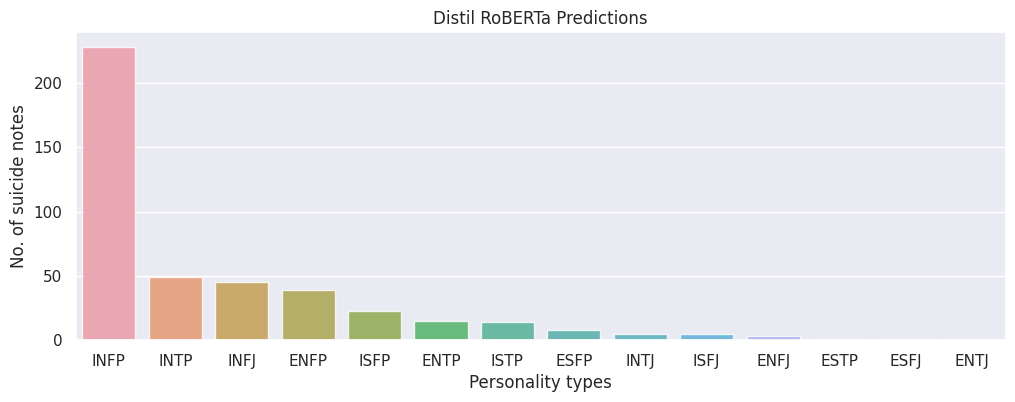

INFP    228
INTP     49
INFJ     45
ENFP     39
ISFP     23
ENTP     15
ISTP     14
ESFP      8
INTJ      5
ISFJ      5
ENFJ      3
ESTP      1
ESFJ      1
ENTJ      1
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


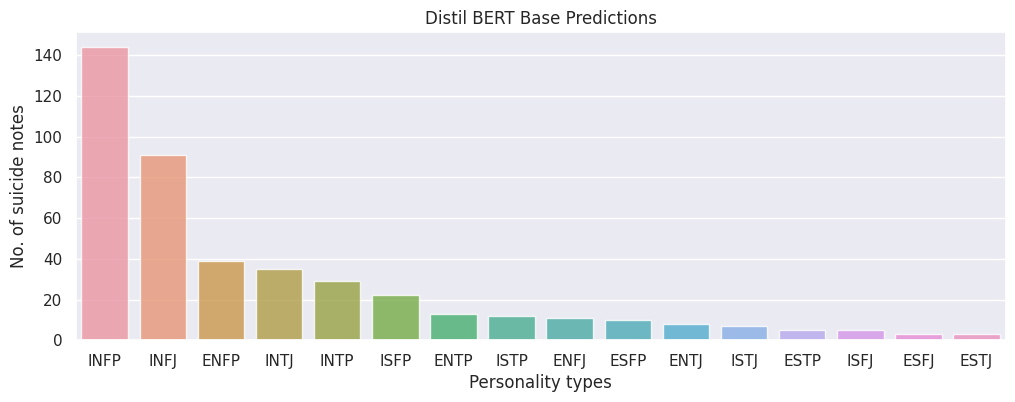

INFP    144
INFJ     91
ENFP     39
INTJ     35
INTP     29
ISFP     22
ENTP     13
ISTP     12
ENFJ     11
ESFP     10
ENTJ      8
ISTJ      7
ESTP      5
ISFJ      5
ESFJ      3
ESTJ      3
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


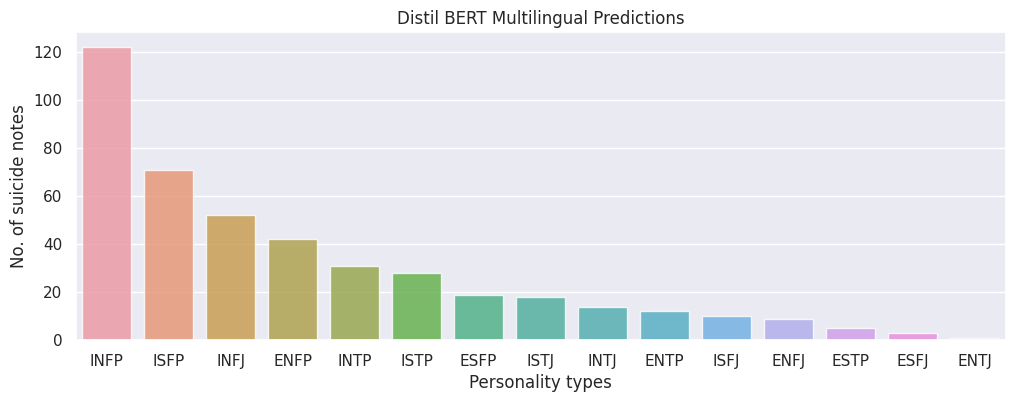

INFP    122
ISFP     71
INFJ     52
ENFP     42
INTP     31
ISTP     28
ESFP     19
ISTJ     18
INTJ     14
ENTP     12
ISFJ     10
ENFJ      9
ESTP      5
ESFJ      3
ENTJ      1
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


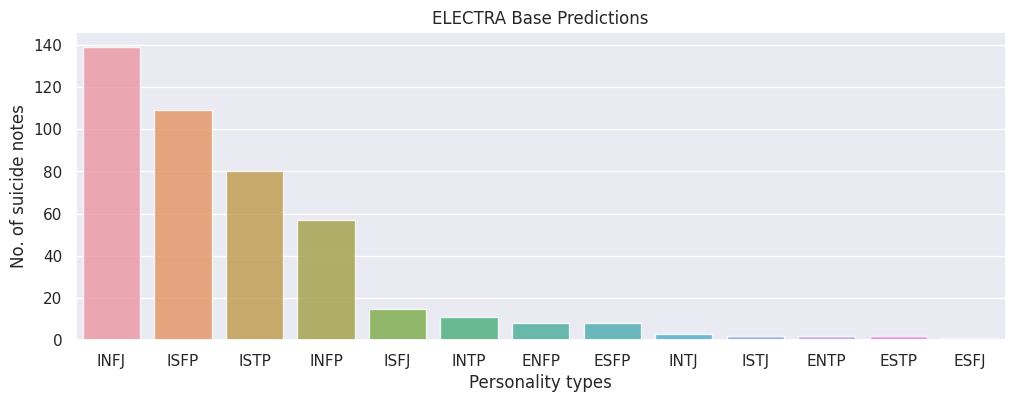

INFJ    139
ISFP    109
ISTP     80
INFP     57
ISFJ     15
INTP     11
ENFP      8
ESFP      8
INTJ      3
ISTJ      2
ENTP      2
ESTP      2
ESFJ      1
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


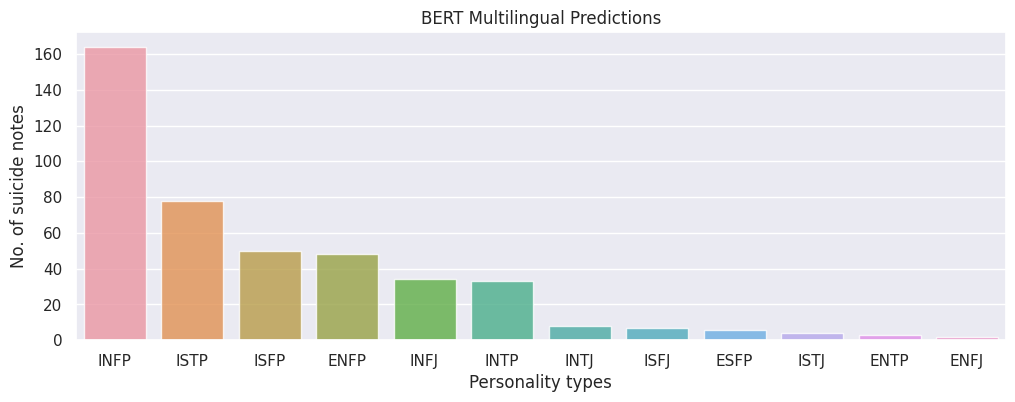

INFP    164
ISTP     78
ISFP     50
ENFP     48
INFJ     34
INTP     33
INTJ      8
ISFJ      7
ESFP      6
ISTJ      4
ENTP      3
ENFJ      2
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


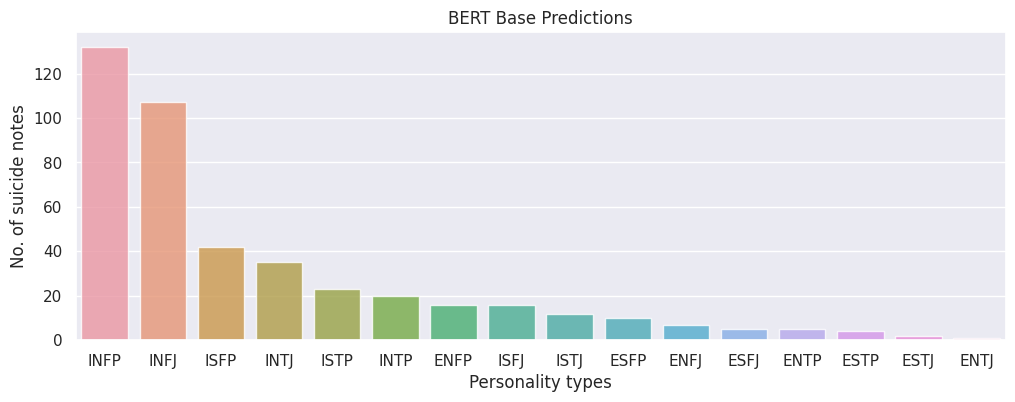

INFP    132
INFJ    107
ISFP     42
INTJ     35
ISTP     23
INTP     20
ENFP     16
ISFJ     16
ISTJ     12
ESFP     10
ENFJ      7
ESFJ      5
ENTP      5
ESTP      4
ESTJ      2
ENTJ      1
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


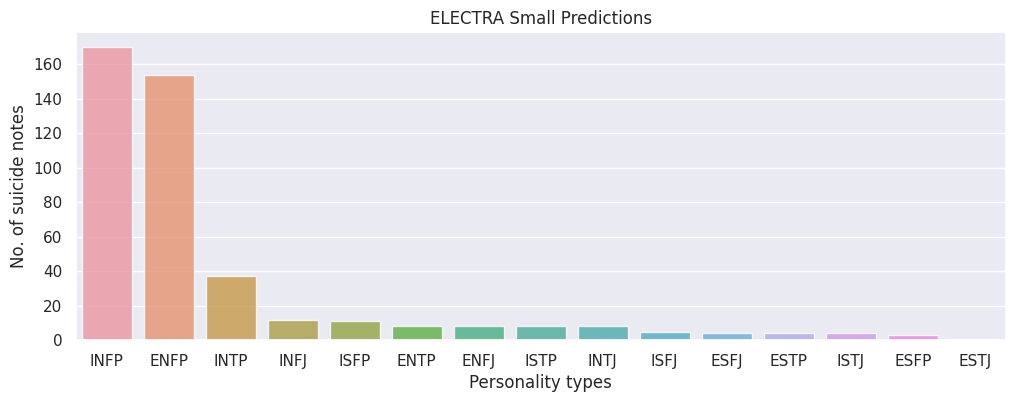

INFP    170
ENFP    154
INTP     37
INFJ     12
ISFP     11
ENTP      8
ENFJ      8
ISTP      8
INTJ      8
ISFJ      5
ESFJ      4
ESTP      4
ISTJ      4
ESFP      3
ESTJ      1
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


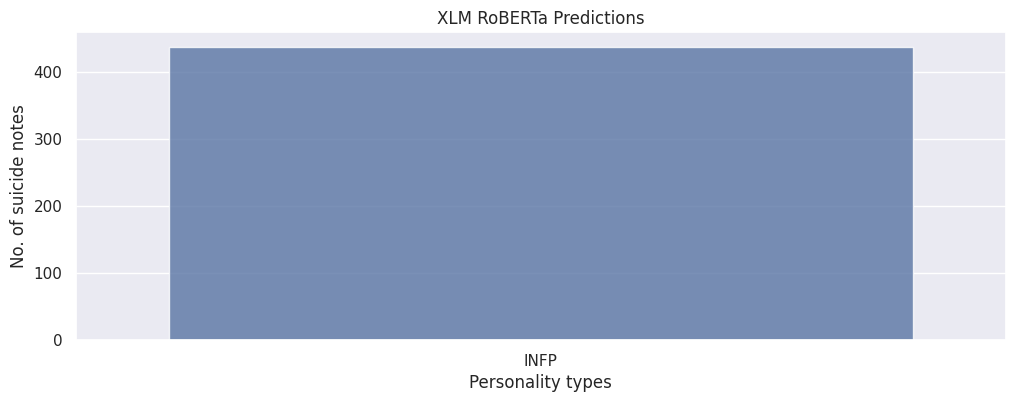

INFP    437
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


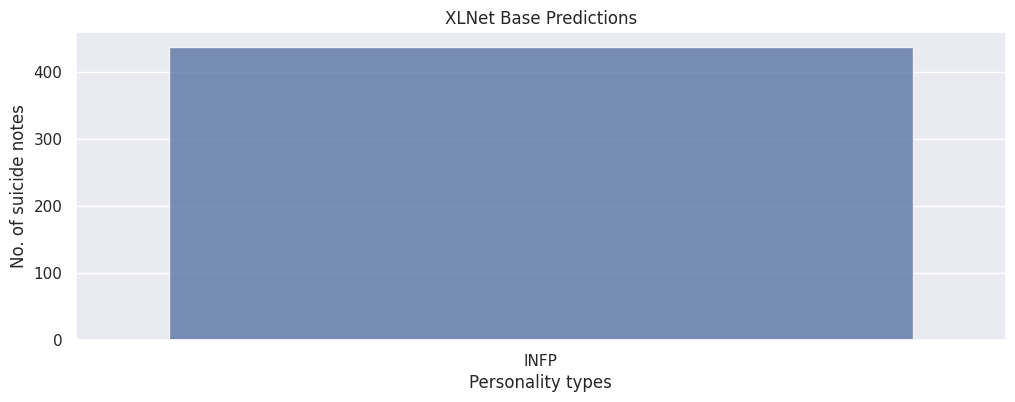

INFP    437
Name: personality, dtype: int64


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


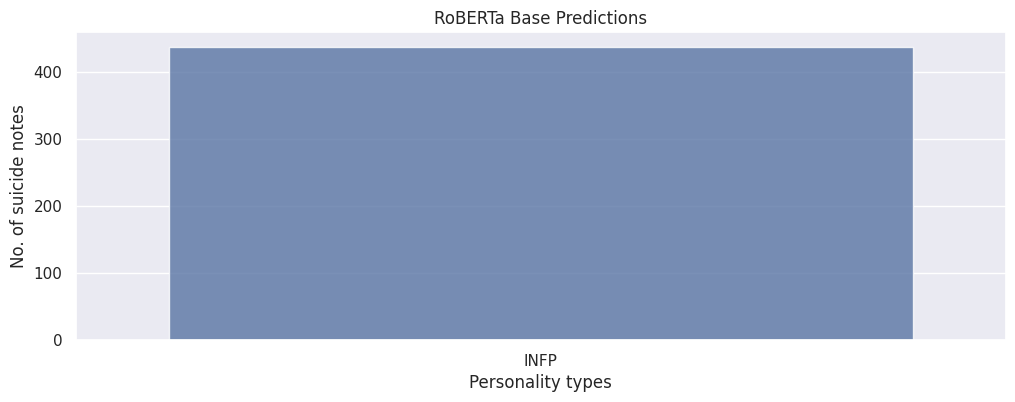

INFP    437
Name: personality, dtype: int64


In [21]:
temp_it = 0

for path in final_path_list:
    with open(f"../outputs/{path}-outputs/{filename}", "r") as json_file:
        data = json.load(json_file)
    df["personality"] = cover_personality(data)    
    #Plotting this in descending order for better understanding of this visualization
    cnt_srs = df['personality'].value_counts()
    plt.figure(figsize=(12,4))
    sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
    plt.title(f'{tm[pos_dic[str(temp_it)]]} Predictions')
    plt.xlabel('Personality types', fontsize=12)
    plt.ylabel('No. of suicide notes', fontsize=12)
    plt.savefig(f'../figures/Suicide/resulted_personalities/{temp_it+1}-{tm[pos_dic[str(temp_it)]]} Predictions.png')
    plt.show()
    print(df["personality"].value_counts())
    temp_it += 1

### Latex format

In [22]:

models_personality = []

blue = set(["INFP",
            "ISFP",
           ])
green = set(["INFJ",
            "ENFP",
            "ISTP",
            "ISFJ",
            "INTP",
            "ESFP",
            ])
yellow = set(["ENFJ",
            "INTJ",
            "ISTJ",
            "ENTP",
            "ESFJ",
            "ESTP",
            ])
red = set(["ESTJ",
           "ENTJ"
])

In [23]:
total_sn = 437

In [24]:
temp_it = 0

for path in final_path_list:
    with open(f"../outputs/{path}-outputs/{filename}", "r") as json_file:
        data = json.load(json_file)
    
    model_results = []
    df["personality"] = cover_personality(data)
    cnt_srs = df['personality'].value_counts()
    cnt_srs = cnt_srs.reset_index(drop=False)
    
    model_results.append(f'{tm[pos_dic[str(temp_it)]]}')
    
    b_count = 0
    g_count = 0
    
    for it, row in cnt_srs.iterrows():
        personality = row["index"]
        per_count = row["personality"]
        
        if personality in blue:
            model_results.append(f"\\cellcolor{'{blue!50}'}{personality} & {per_count}")
            b_count += per_count
        elif personality in green:
            model_results.append(f"\\cellcolor{'{green!50}'}{personality} & {per_count}")
            g_count += per_count
        elif personality in yellow:
            model_results.append(f"\\cellcolor{'{yellow!50}'}{personality} & {per_count}")
        elif personality in red:
            model_results.append(f"\\cellcolor{'{red!50}'}{personality} & {per_count}")
        else:
            print(personality)
            
    while len(model_results) < 17:
        model_results.append(" & ")
    models_personality.append(model_results)
    temp_it += 1

In [25]:
per_num_row = f"\\# & {('Per & Num & '*5)[:-3]} \\\\"
print(per_num_row)

\# & Per & Num & Per & Num & Per & Num & Per & Num & Per & Num \\


In [26]:
print(models_personality[0])

['Distil RoBERTa', '\\cellcolor{blue!50}INFP & 228', '\\cellcolor{green!50}INTP & 49', '\\cellcolor{green!50}INFJ & 45', '\\cellcolor{green!50}ENFP & 39', '\\cellcolor{blue!50}ISFP & 23', '\\cellcolor{yellow!50}ENTP & 15', '\\cellcolor{green!50}ISTP & 14', '\\cellcolor{green!50}ESFP & 8', '\\cellcolor{yellow!50}INTJ & 5', '\\cellcolor{green!50}ISFJ & 5', '\\cellcolor{yellow!50}ENFJ & 3', '\\cellcolor{yellow!50}ESTP & 1', '\\cellcolor{yellow!50}ESFJ & 1', '\\cellcolor{red!50}ENTJ & 1', ' & ', ' & ']


In [24]:
first_five = models_personality[:5]
final_five = models_personality[5:]

In [25]:
def parse_headers_row(five_models):
    headers_list = [ml[0] for ml in five_models]
    rows_content = []
    for i in range(1, len(five_models[0])):
        temp_ans = []
        for ml in five_models:
            temp_ans.append(ml[i])
        rows_content.append(temp_ans)
    return headers_list, rows_content

In [26]:
table_content = "\\hline\n"

In [36]:
def map_headers(headers):
    ans = " & "
    ans += "\\multicolumn{2}{p{1.6cm}}{" + headers[0] + "} & "
    for i in range(1,len(headers)):
        ans += "\multicolumn{2}{|p{1.6cm}}{" + headers[i] + "} & "
    ans = ans[:-3] + " \\\\\\n\\hline\\n"
    ans += """
    \\# & 
        Per & Num &
        Per & Num &
        Per & Num &
        Per. & Num &
        Per. & Num 
        \\\\
    \\hline
    """
    return ans

In [28]:
def parse_row(row, it):
    ans = f"{it} & {' & '.join(row)} \\\\\n"
    return ans

In [37]:
for models_rows in [first_five, final_five]:
    print("\\hline")
    headers_list, rows_content = parse_headers_row(models_rows)
    print(map_headers(headers_list))
    for i in range(len(rows_content)):
        print(parse_row(rows_content[i], i+1))
    print("\\hline")
    print()
    print("\\hline")

\hline
 & \multicolumn{2}{p{1.6cm}}{Distil RoBERTa} & \multicolumn{2}{|p{1.6cm}}{Distil BERT Base} & \multicolumn{2}{|p{1.6cm}}{Distil BERT Multilingual} & \multicolumn{2}{|p{1.6cm}}{ELECTRA Base} & \multicolumn{2}{|p{1.6cm}}{BERT Multilingual} \\\n\hline\n
    \# & 
        Per & Num &
        Per & Num &
        Per & Num &
        Per. & Num &
        Per. & Num 
        \\
    \hline
    
1 & \cellcolor{blue!50}INFP & 228 & \cellcolor{blue!50}INFP & 144 & \cellcolor{blue!50}INFP & 122 & \cellcolor{green!50}INFJ & 139 & \cellcolor{blue!50}INFP & 164 \\

2 & \cellcolor{green!50}INTP & 49 & \cellcolor{green!50}INFJ & 91 & \cellcolor{blue!50}ISFP & 71 & \cellcolor{blue!50}ISFP & 109 & \cellcolor{green!50}ISTP & 78 \\

3 & \cellcolor{green!50}INFJ & 45 & \cellcolor{green!50}ENFP & 39 & \cellcolor{green!50}INFJ & 52 & \cellcolor{green!50}ISTP & 80 & \cellcolor{blue!50}ISFP & 50 \\

4 & \cellcolor{green!50}ENFP & 39 & \cellcolor{yellow!50}INTJ & 35 & \cellcolor{green!50}ENFP & 42 & \cellc